### In this nb we improve on the shock variable used in Exploratory1 and compare WTI response with SPX

In [1]:
import pandas as pd

In [2]:
wti = pd.read_csv('data/WTI.csv', parse_dates=True, index_col='date', dayfirst=True)

<AxesSubplot:xlabel='date'>

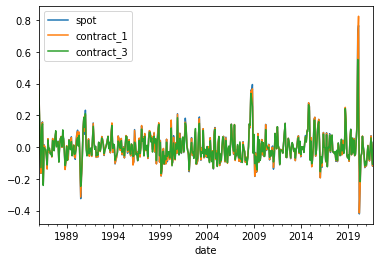

In [3]:
wti_pct = wti.pct_change().dropna()
wti_pct.plot()

In [4]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

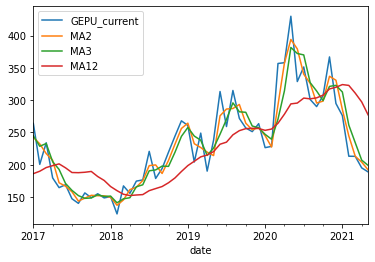

In [5]:
epu = pd.read_csv('data/EPUGlobal.csv', parse_dates=True, index_col='date', dayfirst=True)
epu['MA2'] = epu.GEPU_current.rolling(2).mean()
epu['MA3'] = epu.GEPU_current.rolling(3).mean()
epu['MA12'] = epu.GEPU_current.rolling(12).mean()
epu['MAD2'] = (epu.GEPU_current - epu.MA2).diff()
epu['MAD3'] = (epu.GEPU_current - epu.MA3).diff()
epu['MAD12'] = (epu.GEPU_current - epu.MA12).diff()
epu[['GEPU_current', 'MA2', 'MA3', 'MA12']].loc['2017-01-01':].plot()

<AxesSubplot:xlabel='date'>

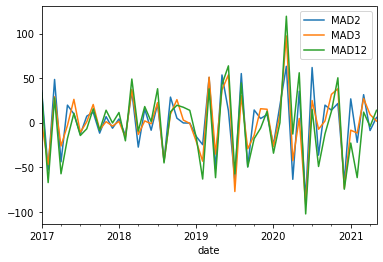

In [6]:
epu[['MAD2', 'MAD3', 'MAD12']].loc['2017-01-01':].plot()

<AxesSubplot:xlabel='date'>

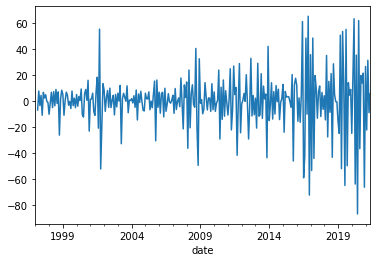

In [7]:
epu.MAD2.plot()

<AxesSubplot:xlabel='date'>

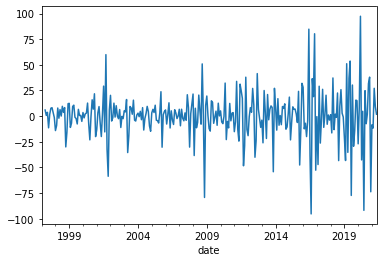

In [8]:
epu.MAD3.plot()

<AxesSubplot:xlabel='date'>

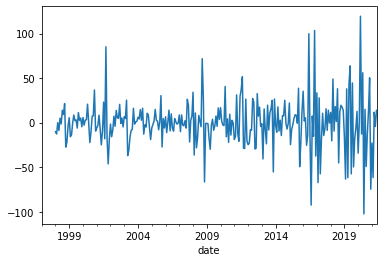

In [9]:
epu.MAD12.plot()

MA2 looks to be the best approximation of near-term expectations, hence MAD2 is probably best to categorize near-term shocks. MAD2 is also the most data-rich.

In [10]:
epu.dropna().head()

,GEPU_current,GEPU_ppp,MA2,MA3,MA12,MAD2,MAD3,MAD12
date,,,,,,,,
1998-01-01,97.823585,94.360973,102.034976,99.544545,78.770782,-10.052734,-14.069184,-10.205067
1998-02-01,85.675712,83.320993,91.749648,96.581888,79.312917,-1.862545,-9.185216,-12.690008
1998-03-01,87.248872,82.809098,86.462292,90.249389,80.877599,6.860516,7.905658,0.008477
1998-04-01,78.904417,72.911993,83.076644,83.943000,81.336071,-4.958807,-2.038066,-8.802926
1998-05-01,85.100300,79.190424,82.002359,83.751196,82.464346,7.270169,6.387688,5.067608


In [11]:
df = wti_pct.join(epu[['MAD2', 'MAD3', 'MAD12']]).dropna()
df.head()

,spot,contract_1,contract_3,MAD2,MAD3,MAD12
date,,,,,,
2021-05-01,-0.086999,-0.086755,-0.077974,5.790791,1.822018,13.815562
2021-04-01,-0.052938,-0.053100,-0.050463,-8.848555,9.137220,-4.287553
2021-03-01,0.009883,0.010697,0.008451,31.402939,27.128765,11.820303
2021-02-01,-0.052784,-0.052919,-0.055117,-22.112731,-11.690047,-61.704554
2021-01-01,-0.119241,-0.117846,-0.112911,26.690392,-8.454843,-22.888182


In [12]:
import statsmodels.api as sm

In [13]:
def news_regression(y_col, x_col, lags=12, df=df):
    x_cols = []
    for i in range(lags+1):
        new_col = f'{x_col}-lag{i}'
        df[new_col] = df[f'{x_col}'].shift(i)
        x_cols.append(new_col)
    df = df.dropna()
    return sm.OLS(df[y_col], sm.add_constant(df[x_cols])).fit()

In [14]:
model1 = news_regression('spot', 'MAD2')
model1.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     1.826
Date:                Tue, 28 Dec 2021   Prob (F-statistic):             0.0396
Time:                        17:57:44   Log-Likelihood:                 227.78
No. Observations:                 269   AIC:                            -427.6
Df Residuals:                     255   BIC:                            -377.2
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.006      0.246      0.806      -0.011       0.014
MAD2-lag0     -0.0005      0.001     -0.548      0.584      -0.003       0.001
MAD2-lag1     -0.0027      0.002     -1.596      0.112      -0.006       0.001
MAD2-lag2     -0.0049      0.002     -2.099      0.037      -0.009      -0.000
MAD2-lag3     -0.0060      0.003     -2.326      0.021      -0.011      -0.001
MAD2-lag4     -0.0057      0.003     -2.136      0.034      -0.011      -0.000
MAD2-lag5     -0.0047      0.003     -1.851      0.065      -0.010       0.000
MAD2-lag6     -0.0040      0.002     -1.674      0.095      -0.009       0.001
MAD2-lag7     -0.0028      0.002     -1.268      0.206      -0.007       0.002
MAD2-lag8     -0.0025      0.002     -1.180      0.239      -0.007       0.002
MAD2-lag9     -0.0031      0.002     -1.545      0.124      -0.007       0.001
MAD2-lag10    -0.0018      0.002     -1.080      0.281      -0.005       0.001
MAD2-lag11    -0.0013      0.001     -1.256      0.210      -0.003       0.001
MAD2-lag12    -0.0006      0.001     -1.024      0.307      -0.002       0.001
==============================================================================
Omnibus:                       67.930   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.124
Skew:                           0.834   Prob(JB):                     9.73e-92
Kurtosis:                       8.883   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [15]:
model2 = news_regression('contract_1', 'MAD2')

In [16]:
model3 = news_regression('contract_3', 'MAD2')

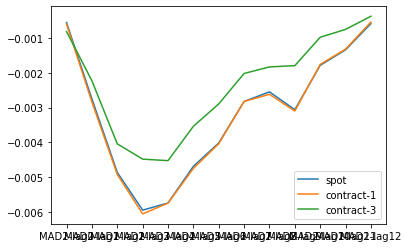

In [17]:
plt.plot(model1.params[1:], label='spot')
plt.plot(model2.params[1:], label='contract-1')
plt.plot(model3.params[1:], label='contract-3')
plt.legend()

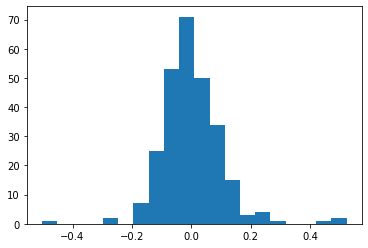

In [18]:
plt.hist(model1.resid, bins=20)
plt.show()

We can see that using MA as benchmark for expectations rather than linearly exptraolating last month's data (as in Exploratory1) is a more unbiased estimator of shock value. However, fat tails remain due to increased variance in shocks in recent years.

<AxesSubplot:xlabel='date'>

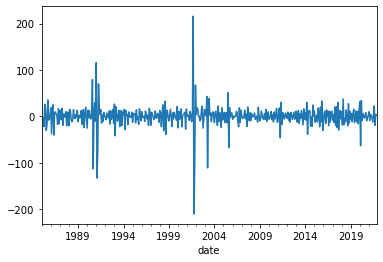

In [19]:
gpr = pd.read_csv('data/GPRGlobal.csv', parse_dates=True, index_col='date', dayfirst=True)
gpr['MA2'] = gpr.GPRI.rolling(2).mean()
gpr['MAD2'] = (gpr.GPRI - gpr.MA2).diff()
gpr['MAD2'].plot()

In [20]:
df2 = wti_pct.join(gpr['MAD2'])

In [21]:
model4 = news_regression('spot', 'MAD2', df=df2)
model4.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.652
Date:                Tue, 28 Dec 2021   Prob (F-statistic):             0.0688
Time:                        17:57:45   Log-Likelihood:                 356.76
No. Observations:                 418   AIC:                            -685.5
Df Residuals:                     404   BIC:                            -629.0
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.005      0.698      0.486      -0.006       0.014
MAD2-lag0     -0.0003      0.000     -0.971      0.332      -0.001       0.000
MAD2-lag1     -0.0005      0.000     -1.428      0.154      -0.001       0.000
MAD2-lag2     -0.0002      0.000     -0.488      0.626      -0.001       0.001
MAD2-lag3      0.0003      0.001      0.598      0.550      -0.001       0.001
MAD2-lag4      0.0003      0.001      0.606      0.545      -0.001       0.001
MAD2-lag5      0.0007      0.001      1.187      0.236      -0.000       0.002
MAD2-lag6      0.0011      0.001      1.709      0.088      -0.000       0.002
MAD2-lag7      0.0012      0.001      1.692      0.091      -0.000       0.003
MAD2-lag8      0.0009      0.001      1.590      0.113      -0.000       0.002
MAD2-lag9      0.0005      0.000      1.013      0.312      -0.000       0.001
MAD2-lag10     0.0005      0.000      1.457      0.146      -0.000       0.001
MAD2-lag11 -4.941e-05      0.000     -0.190      0.850      -0.001       0.000
MAD2-lag12    -0.0001      0.000     -0.659      0.510      -0.000       0.000
==============================================================================
Omnibus:                      244.695   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3681.674
Skew:                           2.175   Prob(JB):                         0.00
Kurtosis:                      16.873   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [22]:
model5 = news_regression('contract_1', 'MAD2', df=df2)
model6 = news_regression('contract_3', 'MAD2', df=df2)

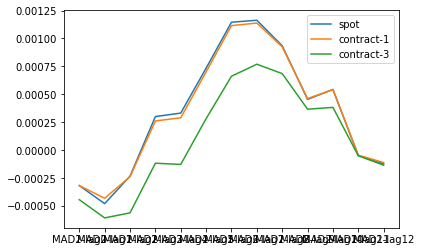

In [23]:
plt.plot(model4.params[1:], label='spot')
plt.plot(model5.params[1:], label='contract-1')
plt.plot(model6.params[1:], label='contract-3')
plt.legend()

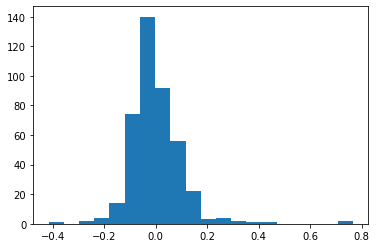

In [24]:
plt.hist(model4.resid, bins=20)
plt.show()

To account for US interventions in the Middle East at the turn of the millenium, we can split the data into pre-2005 and post-2005 to see if that changes our GPRI regression.

In [25]:
model7 = news_regression('spot', 'MAD2', df=df2.loc[:'2005-01-01'])
model7.get_robustcov_results().summary()

<ipython-input-13-db4d7de90bb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[f'{x_col}'].shift(i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.5495
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.891
Time:                        17:57:46   Log-Likelihood:                 131.54
No. Observations:                 190   AIC:                            -235.1
Df Residuals:                     176   BIC:                            -189.6
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.009      0.794      0.428      -0.011       0.025
MAD2-lag0      0.0009      0.002      0.419      0.675      -0.003       0.005
MAD2-lag1      0.0029      0.003      1.047      0.297      -0.003       0.008
MAD2-lag2      0.0044      0.003      1.289      0.199      -0.002       0.011
MAD2-lag3      0.0060      0.004      1.542      0.125      -0.002       0.014
MAD2-lag4      0.0071      0.004      1.734      0.085      -0.001       0.015
MAD2-lag5      0.0078      0.004      1.826      0.069      -0.001       0.016
MAD2-lag6      0.0084      0.004      1.946      0.053      -0.000       0.017
MAD2-lag7      0.0072      0.004      1.852      0.066      -0.000       0.015
MAD2-lag8      0.0059      0.003      1.736      0.084      -0.001       0.013
MAD2-lag9      0.0052      0.003      1.644      0.102      -0.001       0.011
MAD2-lag10     0.0047      0.003      1.696      0.092      -0.001       0.010
MAD2-lag11     0.0032      0.002      1.678      0.095      -0.001       0.007
MAD2-lag12     0.0012      0.001      1.131      0.259      -0.001       0.003
==============================================================================
Omnibus:                      114.577   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1111.723
Skew:                           2.085   Prob(JB):                    3.91e-242
Kurtosis:                      14.093   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [26]:
model8 = news_regression('spot', 'MAD2', df=df2.loc['2005-01-01':])
model8.get_robustcov_results().summary()

<ipython-input-13-db4d7de90bb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[f'{x_col}'].shift(i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.029
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           0.000423
Time:                        17:57:46   Log-Likelihood:                 237.08
No. Observations:                 217   AIC:                            -446.2
Df Residuals:                     203   BIC:                            -398.8
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.006      0.280      0.780      -0.010       0.013
MAD2-lag0     -0.0004      0.000     -2.207      0.028      -0.001   -4.11e-05
MAD2-lag1     -0.0008      0.000     -2.809      0.005      -0.001      -0.000
MAD2-lag2     -0.0005      0.000     -1.364      0.174      -0.001       0.000
MAD2-lag3  -6.689e-05      0.000     -0.152      0.879      -0.001       0.001
MAD2-lag4     -0.0002      0.000     -0.321      0.749      -0.001       0.001
MAD2-lag5      0.0004      0.001      0.598      0.551      -0.001       0.002
MAD2-lag6      0.0006      0.001      1.021      0.308      -0.001       0.002
MAD2-lag7      0.0009      0.001      1.280      0.202      -0.000       0.002
MAD2-lag8      0.0007      0.001      1.178      0.240      -0.000       0.002
MAD2-lag9      0.0002      0.000      0.571      0.569      -0.001       0.001
MAD2-lag10     0.0004      0.000      1.334      0.184      -0.000       0.001
MAD2-lag11    -0.0003      0.000     -1.155      0.249      -0.001       0.000
MAD2-lag12    -0.0001      0.000     -0.782      0.435      -0.000       0.000
==============================================================================
Omnibus:                       41.707   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.147
Skew:                           0.713   Prob(JB):                     1.51e-33
Kurtosis:                       6.832   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

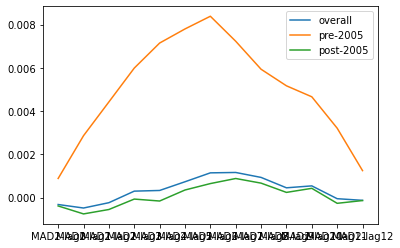

In [27]:
plt.plot(model4.params[1:], label='overall')
plt.plot(model7.params[1:], label='pre-2005')
plt.plot(model8.params[1:], label='post-2005')
plt.legend()

How does crude's reaction time compare to stocks? We will test this with EPU shocks.

In [28]:
spx = pd.read_csv('data/SP500.csv', parse_dates=True, index_col='date', dayfirst=True)
df3 = spx.pct_change().join(epu['MAD2']).dropna()
df3.head()

,SP500,MAD2
date,,
2012-02-01,0.040589,0.624287
2012-03-01,0.031332,5.912105
2012-04-01,-0.007497,-0.123637
2012-05-01,-0.062651,20.321245
2012-06-01,0.039555,-2.131753


In [29]:
model9 = news_regression('SP500', 'MAD2', df=df3)
model9.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.147
Date:                Tue, 28 Dec 2021   Prob (F-statistic):             0.0189
Time:                        17:57:46   Log-Likelihood:                 196.37
No. Observations:                 100   AIC:                            -364.7
Df Residuals:                      86   BIC:                            -328.3
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0112      0.004      2.922      0.004       0.004       0.019
MAD2-lag0     -0.0003      0.000     -1.049      0.297      -0.001       0.000
MAD2-lag1      0.0003      0.000      0.842      0.402      -0.000       0.001
MAD2-lag2      0.0003      0.000      0.857      0.394      -0.000       0.001
MAD2-lag3      0.0002      0.000      0.399      0.691      -0.001       0.001
MAD2-lag4      0.0003      0.001      0.613      0.541      -0.001       0.001
MAD2-lag5      0.0002      0.001      0.355      0.723      -0.001       0.001
MAD2-lag6    8.23e-06      0.001      0.013      0.989      -0.001       0.001
MAD2-lag7     -0.0004      0.001     -0.689      0.493      -0.002       0.001
MAD2-lag8     -0.0002      0.000     -0.442      0.660      -0.001       0.001
MAD2-lag9     -0.0005      0.000     -1.287      0.201      -0.001       0.000
MAD2-lag10    -0.0007      0.000     -2.025      0.046      -0.001   -1.25e-05
MAD2-lag11    -0.0003      0.000     -1.053      0.295      -0.001       0.000
MAD2-lag12  -3.54e-05      0.000     -0.196      0.845      -0.000       0.000
==============================================================================
Omnibus:                        4.788   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.142
Skew:                          -0.414   Prob(JB):                        0.126
Kurtosis:                       3.556   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

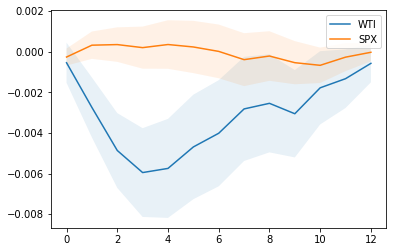

In [30]:
plt.plot(model1.params[1:].reset_index(drop=True), label='WTI')
plt.plot(model9.params[1:].reset_index(drop=True), label='SPX')
plt.fill_between([*range(13)], model1.conf_int()[0][1:], model1.conf_int()[1][1:], alpha=.1)
plt.fill_between([*range(13)], model9.conf_int()[0][1:], model9.conf_int()[1][1:], alpha=.1)
plt.legend()

How about if we now look at shocks in the VIX?

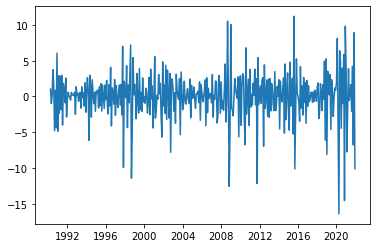

In [31]:
vix = pd.read_csv('data/VIX.csv', parse_dates=True, index_col='date', dayfirst=True)
vix['MA2'] = vix.VIX.rolling(2).mean()
vix['MAD2'] = (vix.VIX - vix.MA2).diff()
plt.plot(vix.MAD2)

In [32]:
df4 = spx.pct_change().join(vix['MAD2']).dropna()
df4.head()

,SP500,MAD2
date,,
2012-02-01,0.040589,1.474999
2012-03-01,0.031332,-0.959999
2012-04-01,-0.007497,2.290000
2012-05-01,-0.062651,2.630000
2012-06-01,0.039555,-6.944999


In [33]:
model10 = news_regression('SP500', 'MAD2', df=df4)
model10.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     15.04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           1.26e-17
Time:                        17:57:46   Log-Likelihood:                 258.73
No. Observations:                 107   AIC:                            -489.5
Df Residuals:                      93   BIC:                            -452.0
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0116      0.002      5.156      0.000       0.007       0.016
MAD2-lag0     -0.0116      0.001    -10.309      0.000      -0.014      -0.009
MAD2-lag1     -0.0139      0.002     -7.367      0.000      -0.018      -0.010
MAD2-lag2     -0.0140      0.003     -5.460      0.000      -0.019      -0.009
MAD2-lag3     -0.0140      0.003     -4.641      0.000      -0.020      -0.008
MAD2-lag4     -0.0130      0.004     -3.684      0.000      -0.020      -0.006
MAD2-lag5     -0.0117      0.004     -2.953      0.004      -0.020      -0.004
MAD2-lag6     -0.0096      0.004     -2.656      0.009      -0.017      -0.002
MAD2-lag7     -0.0082      0.003     -2.864      0.005      -0.014      -0.003
MAD2-lag8     -0.0072      0.002     -3.050      0.003      -0.012      -0.003
MAD2-lag9     -0.0057      0.002     -2.729      0.008      -0.010      -0.002
MAD2-lag10    -0.0034      0.002     -2.142      0.035      -0.007      -0.000
MAD2-lag11    -0.0015      0.001     -1.283      0.203      -0.004       0.001
MAD2-lag12    -0.0011      0.001     -1.362      0.177      -0.003       0.001
==============================================================================
Omnibus:                        5.458   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                5.992
Skew:                          -0.296   Prob(JB):                       0.0500
Kurtosis:                       3.997   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [34]:
df5 = wti_pct.join(vix['MAD2']).dropna()
model11 = news_regression('spot', 'MAD2', df=df5)
model11.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1.874
Date:                Tue, 28 Dec 2021   Prob (F-statistic):             0.0318
Time:                        17:57:46   Log-Likelihood:                 340.12
No. Observations:                 367   AIC:                            -652.2
Df Residuals:                     353   BIC:                            -597.6
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.005      0.476      0.634      -0.008       0.012
MAD2-lag0     -0.0081      0.004     -1.931      0.054      -0.016       0.000
MAD2-lag1     -0.0214      0.007     -3.054      0.002      -0.035      -0.008
MAD2-lag2     -0.0251      0.008     -3.305      0.001      -0.040      -0.010
MAD2-lag3     -0.0227      0.007     -3.447      0.001      -0.036      -0.010
MAD2-lag4     -0.0204      0.006     -3.218      0.001      -0.033      -0.008
MAD2-lag5     -0.0178      0.006     -2.967      0.003      -0.030      -0.006
MAD2-lag6     -0.0123      0.006     -2.124      0.034      -0.024      -0.001
MAD2-lag7     -0.0081      0.005     -1.497      0.135      -0.019       0.003
MAD2-lag8     -0.0089      0.005     -1.667      0.096      -0.019       0.002
MAD2-lag9     -0.0052      0.004     -1.172      0.242      -0.014       0.004
MAD2-lag10    -0.0040      0.003     -1.215      0.225      -0.010       0.002
MAD2-lag11    -0.0056      0.003     -2.176      0.030      -0.011      -0.001
MAD2-lag12    -0.0037      0.002     -2.003      0.046      -0.007   -6.66e-05
==============================================================================
Omnibus:                       91.450   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.165
Skew:                           0.904   Prob(JB):                    5.56e-115
Kurtosis:                       8.581   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

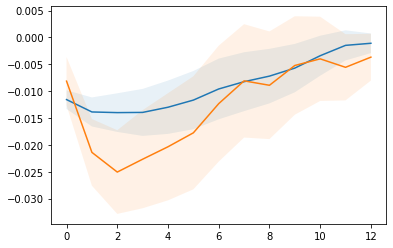

In [38]:
plt.plot(model10.params[1:].reset_index(drop=True), label='SPX')
plt.plot(model11.params[1:].reset_index(drop=True), label='WTI-spot')
plt.fill_between([*range(13)], model10.conf_int()[0][1:], model10.conf_int()[1][1:], alpha=.1)
plt.fill_between([*range(13)], model11.conf_int()[0][1:], model11.conf_int()[1][1:], alpha=.1)

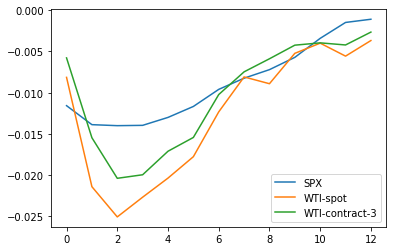

In [39]:
model12 = news_regression('contract_3', 'MAD2', df=df5)
plt.plot(model10.params[1:].reset_index(drop=True), label='SPX')
plt.plot(model11.params[1:].reset_index(drop=True), label='WTI-spot')
plt.plot(model12.params[1:].reset_index(drop=True), label='WTI-contract-3')
plt.legend()

Given that contract-3 is generally less responsive to shocks than spot, it seems SPX prices shocks in the VIX a lot faster than WTI (due to less adjustment in months after), but remains less responsive to shocks overall (perhaps because SPX is a basket of stocks). 

Also note that the statistical significance of VIX on WTI is far greater than EPU, with a higher adjusted R^2 too. Perhaps VIX is the better indicator?